In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from google.colab import files

# **Groups**

The **group** method aggreagates all rows with the same value for a column into a single row in the resulting table.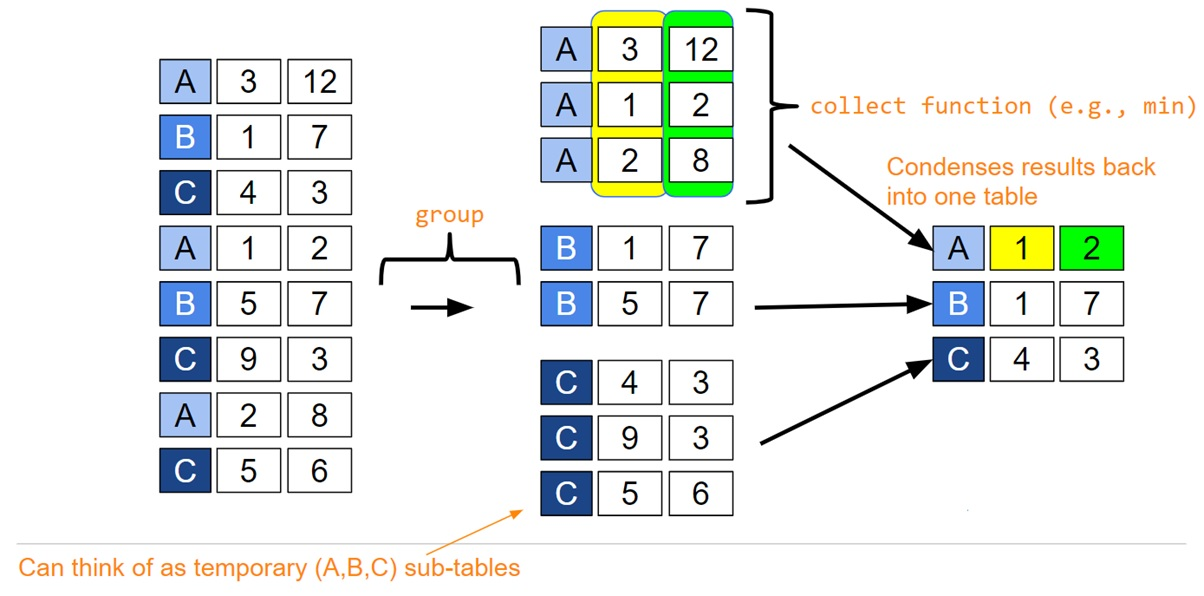

In [2]:
#Upload file
uploaded = files.upload()

Saving olympics2024.csv to olympics2024.csv


In [3]:
#Read the file into a pandas dataframe
olympics = pd.read_csv('olympics2024.csv')

In [4]:
#Output the table, olympics to the screen
olympics

,Rank,Country,Country Code,Continent,Gold,Silver,Bronze,Total,Population,GDP per capita (current US$)
0,1,United States,US,North America,40,44,42,126,3.349149e+08,71972.641370
1,2,China,CHN,Asia,40,27,24,91,1.410710e+09,11689.345810
2,3,Japan,JPN,Asia,20,12,13,45,1.245166e+08,37673.384700
3,4,Australia,AUS,Oceania,18,19,16,53,2.663854e+07,59480.901440
4,5,France,FRA,Europe,16,26,22,64,6.817023e+07,41738.604420
...,...,...,...,...,...,...,...,...,...,...
86,84,Peru,PER,South America,0,0,1,1,3.435272e+07,6949.323111
87,84,Qatar,QAT,Asia,0,0,1,1,2.716391e+06,67370.554620
88,84,Singapore,SIN,Asia,0,0,1,1,5.917648e+06,76062.578980
89,84,Slovakia,SVK,Europe,0,0,1,1,5.426740e+06,21290.114290


In [5]:
#Use group to count the number countries per continent
olympics.groupby('Continent').size()

,0
Continent,
Africa,12
Asia,23
Europe,34
Global,1
North America,12
Oceania,3
South America,6


In [6]:
#Use group to get the sum of all the other columns
olympics.groupby('Continent').sum()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total,Population,GDP per capita (current US$)
Continent,,,,,,,,,
Africa,673,KenyaAlgeriaSouth AfricaEthiopiaEgyptTunisiaBo...,KENALGSAETHEGYTUNBOTUGAMORCPVCIVZAM,13,12,14,39,5.519626e+08,4.027572e+04
Asia,1100,ChinaJapanSouth KoreaUzbekistanIranBahrainChin...,CHNJPNKORUZBIRNBHRTPEHKPHIIDNISRKAZTHAPKNPRKKG...,98,75,90,263,3.987931e+09,4.107843e+05
Europe,1227,FranceNetherlandsGreat BritainItalyGermanyHung...,FRANEDGBGITAGERHUNSPASWENORIREUKRROMGEOBELBULS...,127,139,175,441,6.733465e+08,1.069529e+06
Global,84,Refugee Olympic Team,EOR,0,0,1,1,0.000000e+00,0.000000e+00
North America,624,United StatesCanadaCubaJamaicaSt LuciaDominica...,USCANCUBJAMLCADOMGUADMAMEXPANGRNPUR,56,60,70,186,5.544769e+08,2.414673e+05
Oceania,89,AustraliaNew ZealandFiji,AUSNZFIJ,28,27,19,74,3.279802e+07,1.109859e+05
South America,326,BrazilEcuadorArgentinaChileColombiaPeru,BRZECUARGCHICOLPER,6,14,15,35,3.873350e+08,5.453006e+04


In [7]:
#Use group to calculate the average population size for each continent
olympics.groupby('Continent')['Population'].mean()

,Population
Continent,
Africa,4.599689e+07
Asia,1.812696e+08
Europe,1.980431e+07
Global,NaN
North America,4.620641e+07
Oceania,1.093267e+07
South America,6.455583e+07


## Pivot


Groups according to two columns

Produces a grid of counts or aggregated values

Two required main arguments:
* values: variable that forms column labels of the grid
* index: variable that forms row labels of the grid

In [9]:
# summarise each subgroup
olympics.pivot_table(index='Continent', values=['Gold','Silver','Bronze'], aggfunc='sum')[['Gold','Silver','Bronze']]

,Gold,Silver,Bronze
Continent,,,
Africa,13,12,14
Asia,98,75,90
Europe,127,139,175
Global,0,0,1
North America,56,60,70
Oceania,28,27,19
South America,6,14,15


# Building a table

**By column**

In [11]:
# build a table column by column
live_stock = pd.DataFrame({'species':['cattle','sheep','chicken','goat']})
live_stock

,species
0,cattle
1,sheep
2,chicken
3,goat


In [12]:
# Add a column to a table
live_stock['height'] = [166, 74, 35, 64]
live_stock

,species,height
0,cattle,166
1,sheep,74
2,chicken,35
3,goat,64


**By row**

In [13]:
# build a table row by row
live_stock = pd.DataFrame([['cattle', 166, 15],['sheep',74,22],['chicken',35,11]],
                          columns=['species','height','ave_age'])
live_stock

,species,height,ave_age
0,cattle,166,15
1,sheep,74,22
2,chicken,35,11


In [14]:
# create a df with a number of new rows
new_rows = pd.DataFrame([['cattle', 173, 18],
                      ['goat', 64, 25]],
                        columns=['species', 'height', 'ave_age'])
new_rows

,species,height,ave_age
0,cattle,173,18
1,goat,64,25


In [15]:
# add new rows
live_stock = pd.concat([live_stock,new_rows], ignore_index=True)
live_stock

,species,height,ave_age
0,cattle,166,15
1,sheep,74,22
2,chicken,35,11
3,cattle,173,18
4,goat,64,25


## Join \ Merge


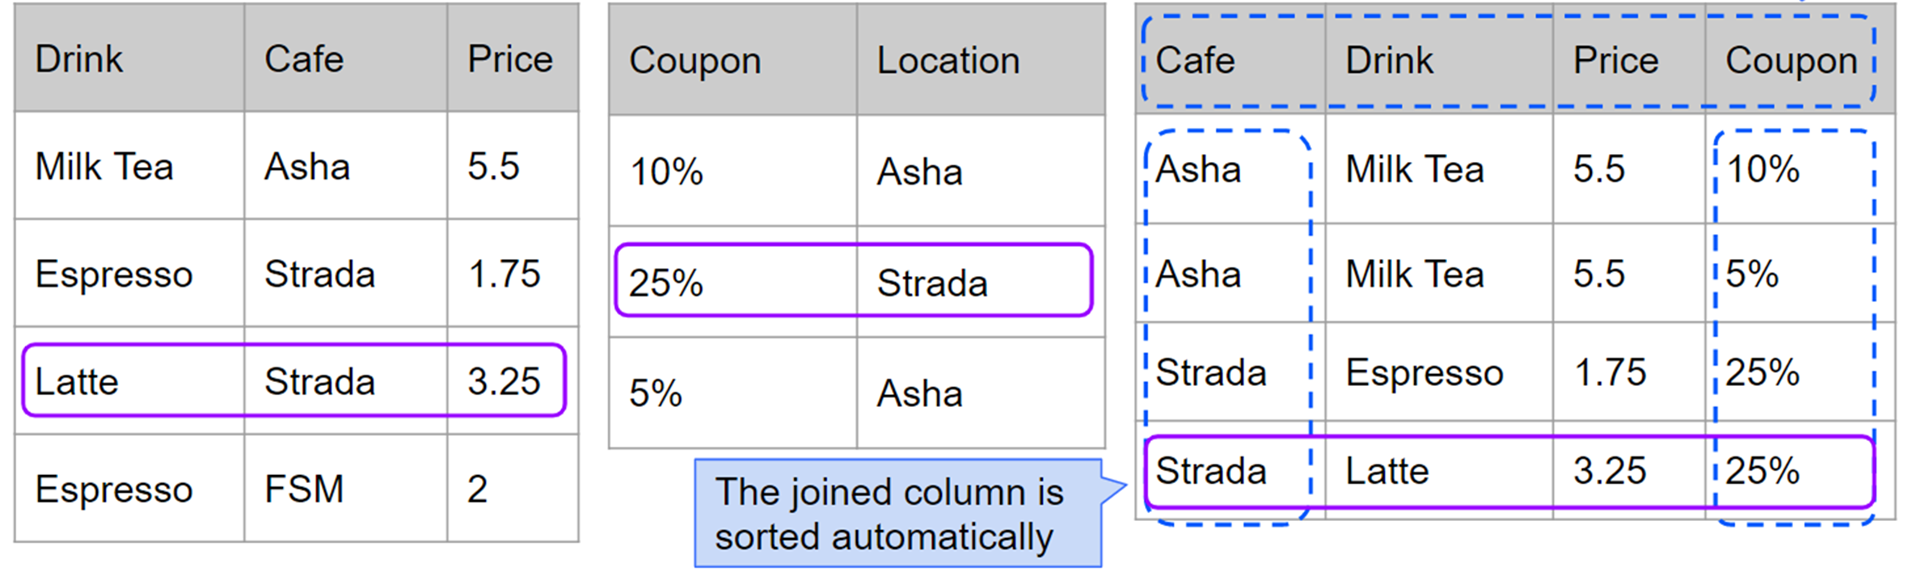

In [16]:
# build a second table
live_stock_cont = pd.DataFrame({'animal': ['cattle','sheep','chicken','goat'], 'exp_weight' : [800,50,3,36]})
live_stock_cont

,animal,exp_weight
0,cattle,800
1,sheep,50
2,chicken,3
3,goat,36


In [17]:
live_stock

,species,height,ave_age
0,cattle,166,15
1,sheep,74,22
2,chicken,35,11
3,cattle,173,18
4,goat,64,25


In [21]:
# add the information from the second table to that of the first
table_ext = pd.merge(live_stock, live_stock_cont, left_on='species', right_on='animal', how='left')
table_ext

,species,height,ave_age,animal,exp_weight
0,cattle,166,15,cattle,800
1,sheep,74,22,sheep,50
2,chicken,35,11,chicken,3
3,cattle,173,18,cattle,800
4,goat,64,25,goat,36


In [ ]:
# drop column
table_ext.drop(columns=['animal'])

In [ ]:
# create a third table
another_live_stock_cont = pd.DataFrame({'species': ['cow','sheep','chicken','goat'], 'ave_age': [16,24,10,31]})
another_live_stock_cont

In [ ]:
table_ext2 = pd.merge(live_stock, another_live_stock_cont, left_on='species', right_on='species', how='right')
table_ext2

# TAKE-HOME EXERCISE


**Complete the following take-home exercise for the next workshop session:**


You would like to get a male puppy that suites your lifestyle. To help you with your decision you obtain information on 97 dog breeds (captured in a table in the file dog_breeds.csv). According to the data in the table, which dog breeds can you consider?

**The dog should:**

Have a below average height (take the maximum height of the for male dogs as the expected height for a breed)

Definitely not be a barker (barking scores of 1 or 2 only)

Be good with children (good_with_children score of 4 or 5)
